In [246]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set up to display all columns
pd.set_option('display.max_columns', None)

In [247]:
#import dataset
df_leads = pd.read_csv('Leads.csv') 

## DATA Analysis 

In [248]:
# Inspect the data
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [249]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [250]:
df_leads.shape

(9240, 37)

In [251]:
# inspect the missing values
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [252]:
# Check the missing data percentage in each column
missing_data = pd.DataFrame(df_leads.isnull().sum()/len(df_leads)*100).reset_index()
print(missing_data)

                                            index          0
0                                     Prospect ID   0.000000
1                                     Lead Number   0.000000
2                                     Lead Origin   0.000000
3                                     Lead Source   0.389610
4                                    Do Not Email   0.000000
5                                     Do Not Call   0.000000
6                                       Converted   0.000000
7                                     TotalVisits   1.482684
8                     Total Time Spent on Website   0.000000
9                            Page Views Per Visit   1.482684
10                                  Last Activity   1.114719
11                                        Country  26.634199
12                                 Specialization  15.562771
13             How did you hear about X Education  23.885281
14                What is your current occupation  29.112554
15  What matters most to

In [253]:
# Select columns with object or category dtype as categorical columns
categorical_columns = df_leads.select_dtypes(include=['object', 'category']).columns

# Get unique values from each categorical column
categorical_values = {
    column: df_leads[column].unique().tolist()
    for column in categorical_columns
}

for column, values in categorical_values.items():
    print(f"{column}: {values}")

Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620', '2a272436-5132-4136-86fa-dcc88c88f482', '8cc8c611-a219-4f35-ad23-fdfd2656bd8a', '0cc2df48-7cf4-4e39-9de9-19797f9b38cc', '3256f628-e534-4826-9d63-4a8b88782852', '2058ef08-2858-443e-a01f-a9237db2f5ce', '9fae7df4-169d-489b-afe4-0f3d752542ed', '20ef72a2-fb3b-45e0-924e-551c5fa59095', 'cfa0128c-a0da-4656-9d47-0aa4e67bf690', 'af465dfc-7204-4130-9e05-33231863c4b5', '2a369e35-ca95-4ca9-9e4f-9d27175aa320', '9bc8ce93-6144-49e0-9f9d-080fc980f83c', '8bf76a52-2478-476b-8618-1688e07874ad', '88867067-3750-4753-8d33-1c7d1db53b5e', 'a8531c22-fcf1-48f8-a711-fb5abf98ad87', '25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f', '3abb7c77-1634-4083-9a9f-861068220611', 'e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2', '82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c', '4512c16a-e96a-4459-b9ec-c7d8fe8c4880', 'c4419c99-b002-408b-a6fd-fa100716592c', 'fd71ab5b-53b8-4105-9960-efedc44962fa', '8fd38b83-5c32-4277-bcfb-499f34a01c56', 'ecbc6e69-29a9-44bf-804a-13079ef301bc', 'ecd117ca-375f-49ea-afd6-b

# Data preparation 
    a. Encoding categorical variables 
        - Converting yes no into 1 and 0 
        - Zero hot encoding for variables with more than two categorical values
    b. Handlign missing values
    c. Convert Select to NaN
    d. Drop the missing values 
    e. Handling unselected options i.e. Select 
    f. Deleting the columns that have no/ less variance 


In [254]:

# Find columns with only 'Yes' and 'No' values
yes_no_cols = [col for col in df_leads.columns if df_leads[col].dropna().isin(['Yes', 'No']).all()]

print( yes_no_cols)

['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


In [255]:
#Coverting binary variables yes/no into 0 and 1 
#  Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


# Applying the function to the housing list
df_leads[yes_no_cols] = df_leads[yes_no_cols].apply(binary_map)

In [256]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [257]:
# Convert all occurrences of 'Select' to NaN as select is where customer has not selected any option so same as NaN/missing value
# Used regex to make it case insensitive
df_leads.replace('(?i)Select', np.nan, regex=True, inplace=True)


In [258]:
# Check if any more  select/SELECT is present in any column
df_leads.isin(['Select','SELECT']).sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [259]:
df_leads.isnull().sum() 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [260]:
# Handling the missing values in the columns
# Select columns with more than 50% missing values
missing_cols = df_leads.columns[df_leads.isnull().mean() > 0.5]
print(missing_cols)

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile'], dtype='object')


In [261]:
# Dropping  the columsn with more than 50% missing values as too much data is missing to provide reliable insights.
df_leads.drop(missing_cols, axis=1, inplace=True)

In [262]:
df_leads['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

Asymmetrique Activity Index  45.649351
Asymmetrique Profile Index  45.649351
Asymmetrique Activity Score  45.649351
Asymmetrique Profile Score  45.649351

Have 45% null values - as these are score assigned to each customer based on their activity and their profile imputing the values with mean or max will be wrong we don't know how they are calculated. So dropping these columns


Asymmetrique Activity Index: ['02.Medium', '01.High', '03.Low', nan]
Asymmetrique Profile Index: ['02.Medium', '01.High', '03.Low', nan]

In [263]:
# Drop the columns ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'] for the reason stated above 

df_leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [264]:
df_leads.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberia                    1
Denmar

In [265]:
# Code to find the percentage of rows with country values
df_leads.Country.value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Kuwait                   0.059006
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Canada                   0.059006
Sweden                   0.044254
Italy                    0.029503
Belgium                  0.029503
Ghana                    0.029503
Philippines              0.029503
Netherlands              0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Bangladesh               0.029503
Uganda                   0.029503
Russia                   0.014751
Sri La

In [266]:
df_leads['Country'].isnull().sum()

np.int64(2461)

In [267]:
# As 96% of country is India the missing values can be imputed with India
df_leads['Country'].fillna('India', inplace=True)

In [268]:
df_leads['Country'].isnull().sum()

np.int64(0)

In [269]:
df_leads.City.isnull().sum()

np.int64(3669)

In [270]:
df_leads.City.value_counts(normalize=True)*100

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

In [271]:
# calculate teh percentage of missing values in City column
df_leads.City.isnull().sum()/len(df_leads)*100

np.float64(39.70779220779221)

While 57% of the cities is Mumbai around 40% of the columns are null. we can't impute data for the such large number of missing values. 
Hence dropping the column City 

In [272]:
# Drop the column City as it has 39% missing values and for the above stated reason 
df_leads.drop('City', axis=1, inplace=True)

In [273]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [274]:
#Checking for Tags missing values 
df_leads.Specialization.value_counts(normalize=True)*100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

In [275]:
# As speciliazation has lot of values, and through EDA of each identified that there is no difference of these individual values on the 
# conversion rate, so merging the values into three categories i.e. Management, Generic business and industry specific specializations

#merge all management courses
df_leads.loc[(df_leads.Specialization == 'Finance Management') | (df_leads.Specialization == 'Human Resource Management') | 
       (df_leads.Specialization == 'Marketing Management') |  (df_leads.Specialization == 'Operations Management') |
       (df_leads.Specialization == 'IT Projects Management') | (df_leads.Specialization == 'Supply Chain Management') |
       (df_leads.Specialization == 'Healthcare Management') | (df_leads.Specialization == 'Hospitality Management') |
       (df_leads.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

#merge all business courses
df_leads.loc[(df_leads.Specialization == 'Business Administration') | (df_leads.Specialization == 'International Business') | 
       (df_leads.Specialization == 'Rural and Agribusiness') | (df_leads.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

#merge all industry courses
df_leads.loc[(df_leads.Specialization == 'Banking, Investment And Insurance') | (df_leads.Specialization == 'Media and Advertising') |
       (df_leads.Specialization == 'Travel and Tourism') | (df_leads.Specialization == 'Services Excellence') |
       (df_leads.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [276]:
#filling the nulls with random choice of above three categories and in proportion
df_leads['Specialization'] = df_leads.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df_leads))))

In [277]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [278]:
# rename the column name 'What is your current occupation' to 'Occupation'
df_leads.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

In [279]:
df_leads.Occupation.value_counts(normalize=True)*100

Occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [280]:
# As 86% is unemployed marking the missing values as unemployed
df_leads['Occupation'] = df_leads['Occupation'].replace(np.nan, 'Unemployed')

In [281]:
df_leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [282]:
# As nearly 100% of the data in "What matters most to you in choosing a course" is Better Career Prospects, dropping the column
df_leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [283]:
df_leads['Tags'].value_counts(normalize=True)*100

Tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

In [284]:
# Marking the missing values of Tags as 'Will revert after reading the email' as its the most common value 33%
df_leads['Tags'] = df_leads['Tags'].replace(np.nan, 'Will revert after reading the email')

In [285]:
# there is one lead source which is not clear so marking it as 'Other'
df_leads['Lead Source'].value_counts(normalize=True)*100

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64

In [286]:
# Correct google as Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google', 'Google')

In [287]:
#mark the missing lead source as 'Google'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(np.nan, 'Google')

In [288]:
# Check the missing data percentage in each column
missing_data = pd.DataFrame(df_leads.isnull().sum()/len(df_leads)*100).reset_index()
print(missing_data)

                                       index         0
0                                Prospect ID  0.000000
1                                Lead Number  0.000000
2                                Lead Origin  0.000000
3                                Lead Source  0.000000
4                               Do Not Email  0.000000
5                                Do Not Call  0.000000
6                                  Converted  0.000000
7                                TotalVisits  1.482684
8                Total Time Spent on Website  0.000000
9                       Page Views Per Visit  1.482684
10                             Last Activity  1.114719
11                                   Country  0.000000
12                            Specialization  0.000000
13                                Occupation  0.000000
14                                    Search  0.000000
15                                  Magazine  0.000000
16                         Newspaper Article  0.000000
17        

In [289]:
# the numerical columns have  TotalVisits and Page Views Per Visit have few null values imputing them with mean 

df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(), inplace=True)
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(), inplace=True)

In [290]:
# Impute the last Activity with the most common value
df_leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [291]:
# Impute the last Activity with the most common value  i.e Email Opened
df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan, 'Email Opened')

In [292]:
df_leads.shape

(9240, 28)

## Explanatory Data Analysis 

Visualizing impact of categorical variables on cnt 
Categorical_vars = ['Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization',Tags,City,Occupation]

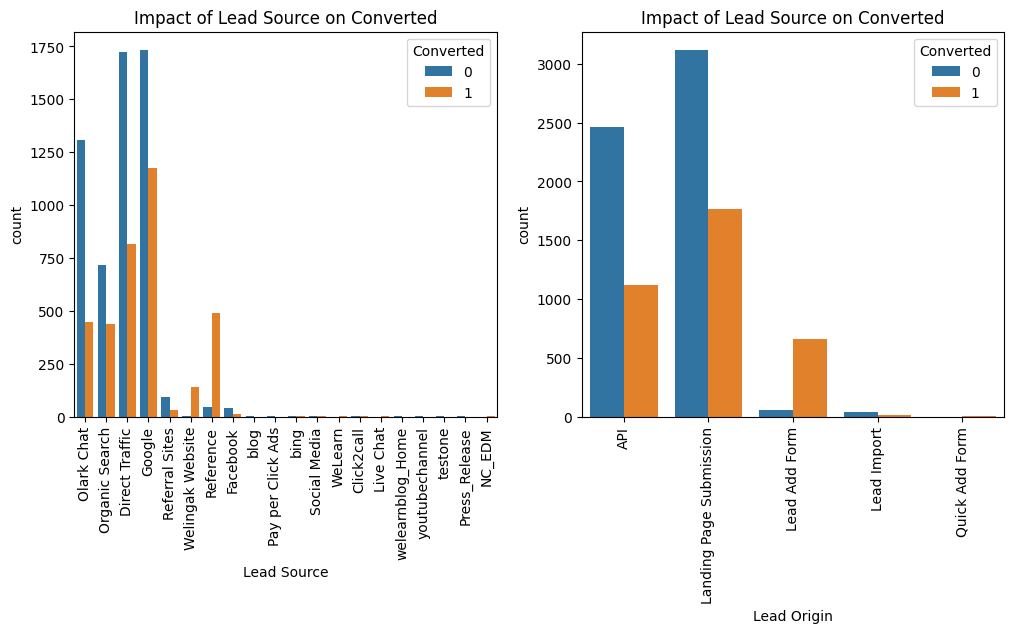

In [293]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.countplot(x='Lead Source', hue='Converted', data=df_leads)
plt.title('Impact of Lead Source on Converted')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data=df_leads)
plt.title('Impact of Lead Source on Converted')
plt.xticks(rotation=90)
plt.show()
plt.show()

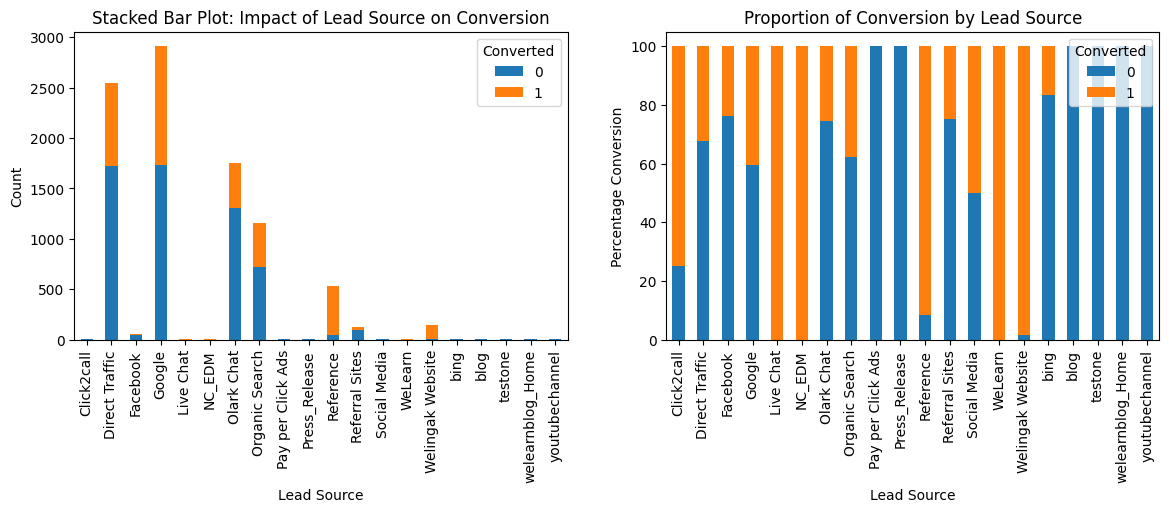

In [294]:
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Stacked bar plot with counts
plt.subplot(1, 2, 1)
crosstab_counts = pd.crosstab(df_leads['Lead Source'], df_leads['Converted'])
crosstab_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Plot: Impact of Lead Source on Conversion')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Converted')

# Second subplot: Stacked bar plot with percentages
plt.subplot(1, 2, 2)
crosstab_percent = pd.crosstab(df_leads['Lead Source'], df_leads['Converted'], normalize='index') * 100
crosstab_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Conversion by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Percentage Conversion')
plt.xticks(rotation=90)
plt.legend(title='Converted')


While Google and Direct Traffic provide the maximum leads the Conversion rate of References, Welingak Website with decent count. 
We learn, NC_EDM, Live Chat have 100% conversion but their counts are low 


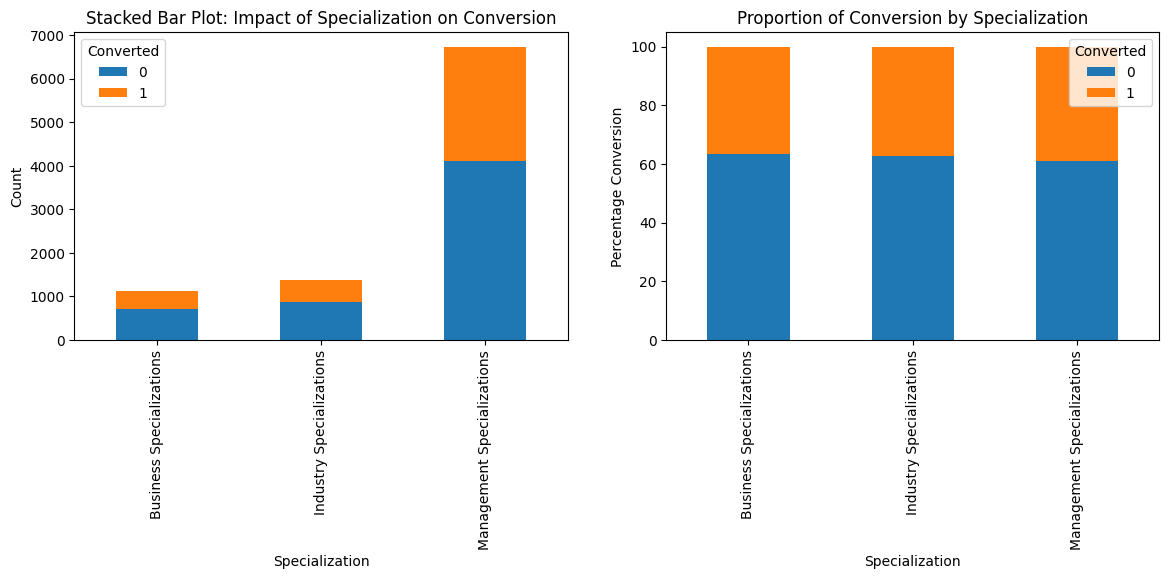

In [295]:
# Checking for specialization and occupation
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Stacked bar plot with counts
plt.subplot(1, 2, 1)
crosstab_counts = pd.crosstab(df_leads['Specialization'], df_leads['Converted'])
crosstab_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Plot: Impact of Specialization on Conversion')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Converted')

# Second subplot: Stacked bar plot with percentages
plt.subplot(1, 2, 2)
crosstab_percent = pd.crosstab(df_leads['Specialization'], df_leads['Converted'], normalize='index') * 100
crosstab_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Conversion by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Percentage Conversion')
plt.xticks(rotation=90)
plt.legend(title='Converted')

Management Specialization gets the maximum leads but there is no difference in the percentage of conversion based on the type of Specialization 

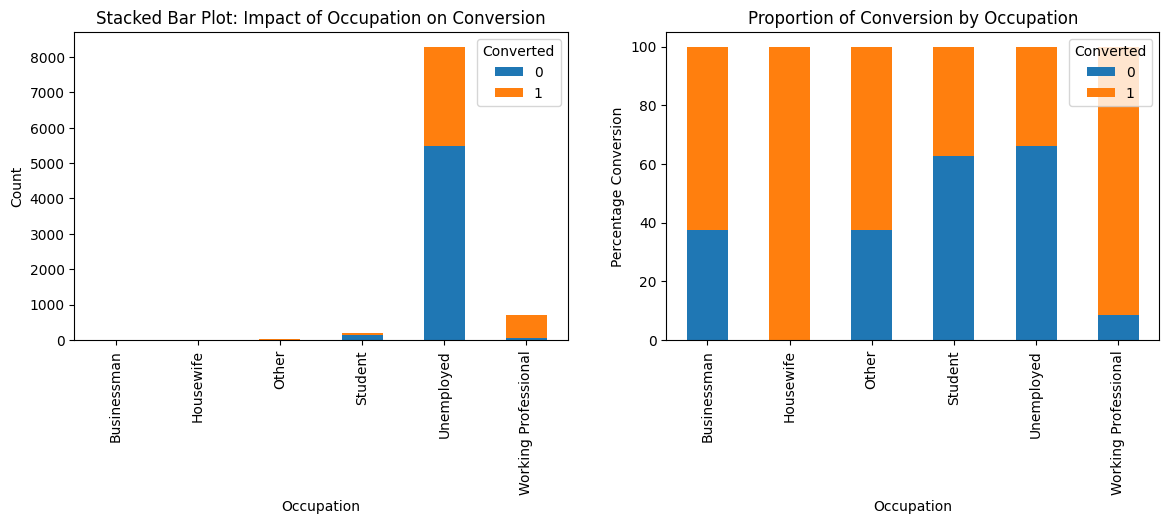

In [296]:
# Checking for Occupation
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Stacked bar plot with counts
plt.subplot(1, 2, 1)
crosstab_counts = pd.crosstab(df_leads['Occupation'], df_leads['Converted'])
crosstab_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Plot: Impact of Occupation on Conversion')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Converted')

# Second subplot: Stacked bar plot with percentages
plt.subplot(1, 2, 2)
crosstab_percent = pd.crosstab(df_leads['Occupation'], df_leads['Converted'], normalize='index') * 100
crosstab_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Conversion by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage Conversion')
plt.xticks(rotation=90)
plt.legend(title='Converted')

Unemployed in the biggest pool in terms of leads .  
Working professionals have the highest conversion rate and 2nd in count so one of the best pool to target
Conversion rate of house wives is 100% numbers are low. 

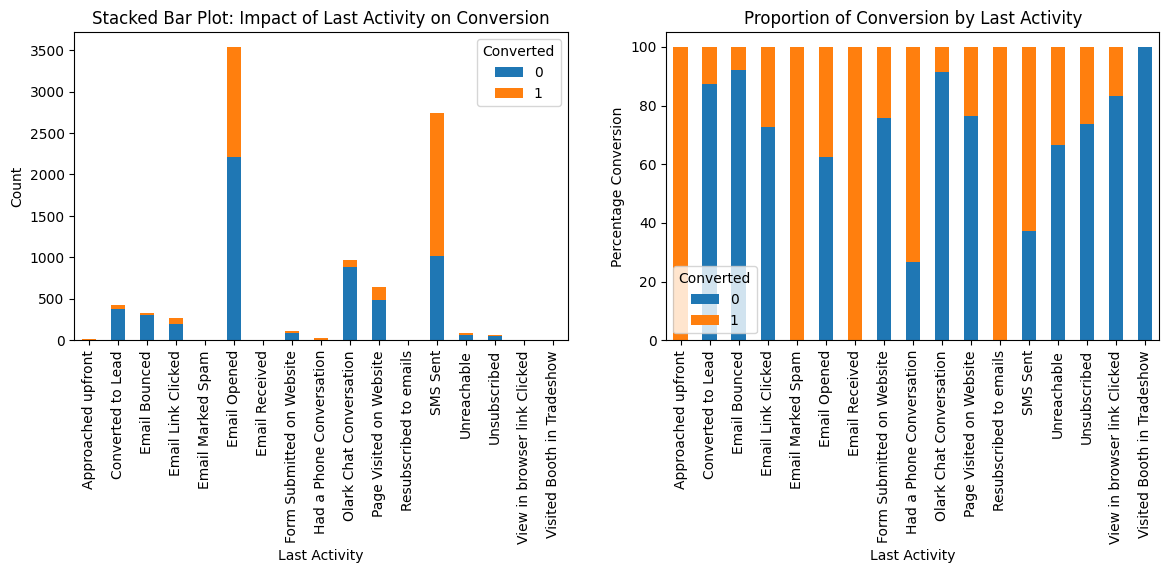

In [297]:
# Checking for Last Activity
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Stacked bar plot with counts
plt.subplot(1, 2, 1)
crosstab_counts = pd.crosstab(df_leads['Last Activity'], df_leads['Converted'])
crosstab_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Plot: Impact of Last Activity on Conversion')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Converted')

# Second subplot: Stacked bar plot with percentages
plt.subplot(1, 2, 2)
crosstab_percent = pd.crosstab(df_leads['Last Activity'], df_leads['Converted'], normalize='index') * 100
crosstab_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Conversion by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Percentage Conversion')
plt.xticks(rotation=90)
plt.legend(title='Converted')

Of the two major categories SMS Sent and Email Opened. 
SMS Conversation seems more promising than email in terms of percentage of conversion 

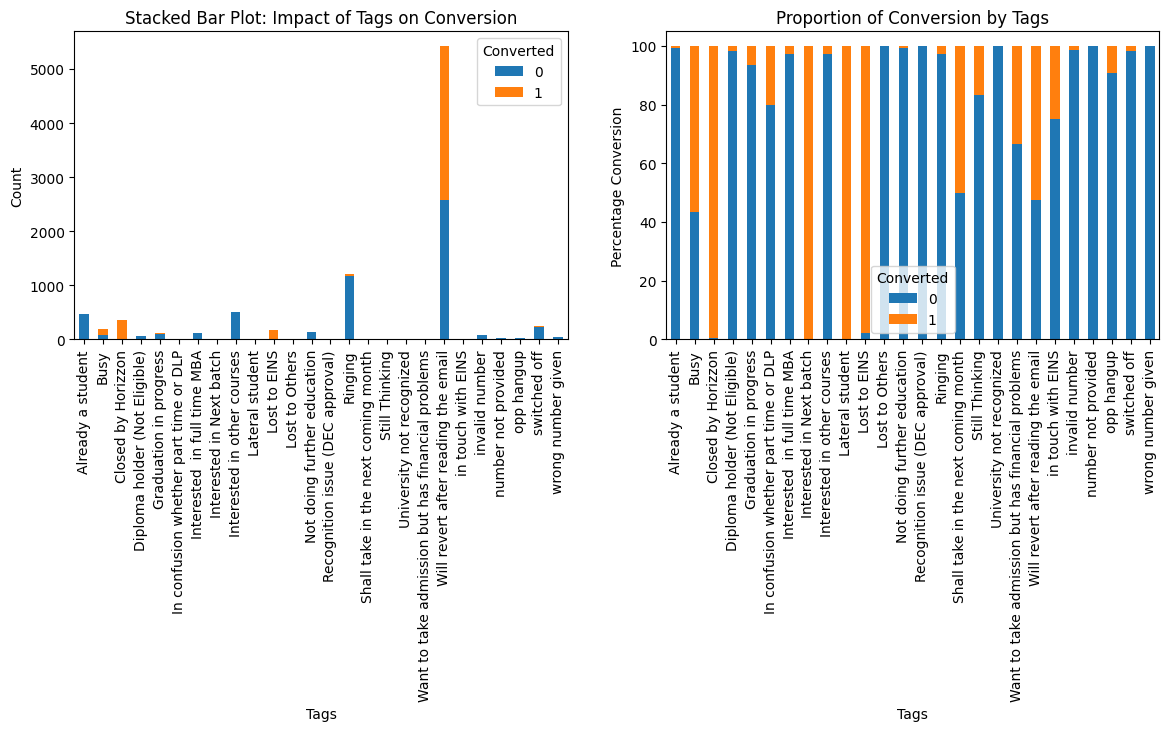

In [298]:
# Checking for Tags
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Stacked bar plot with counts
plt.subplot(1, 2, 1)
crosstab_counts = pd.crosstab(df_leads['Tags'], df_leads['Converted'])
crosstab_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Plot: Impact of Tags on Conversion')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Converted')

# Second subplot: Stacked bar plot with percentages
plt.subplot(1, 2, 2)
crosstab_percent = pd.crosstab(df_leads['Tags'], df_leads['Converted'], normalize='index') * 100
crosstab_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Conversion by Tags')
plt.xlabel('Tags')
plt.ylabel('Percentage Conversion')
plt.xticks(rotation=90)
plt.legend(title='Converted')

Will revert after reading the email' has highest counts and decent coversion rate 
Closed by Horizon has good enough count and close to 100% coversion rate 


Checking for the numerical columns - first did EDA for numerical columns to know the impact and then we checked and removed the outliers 

Text(0.5, 1.0, 'Impact of Page Views Per Visit')

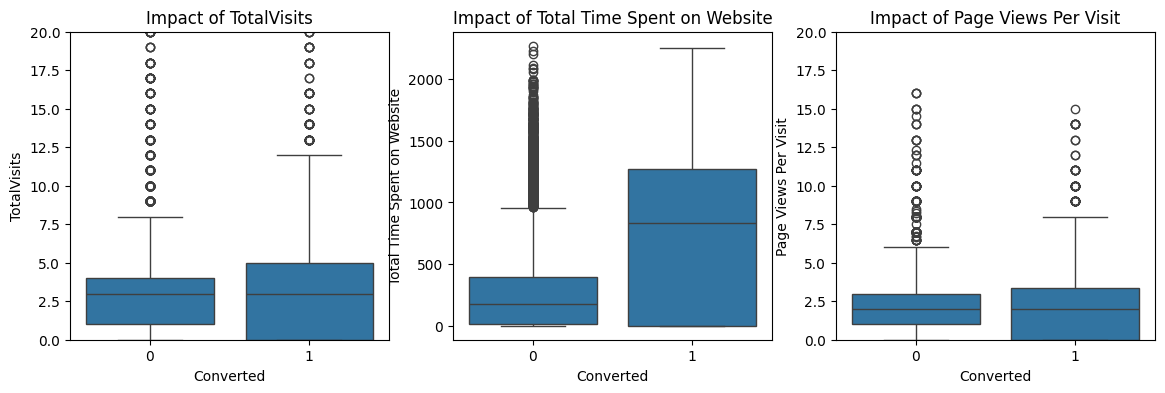

In [299]:
# Checking for the numerical columns through box plots
# Create the figure and subplots
plt.figure(figsize=(14, 4))  # Increased figure size for better spacing

# First subplot: Box plot for TotalVisits
plt.subplot(1,3,1)
sns.boxplot(x='Converted', y='TotalVisits', data=df_leads)
plt.title('Impact of TotalVisits')
plt.ylim(0, 20)  # Limiting y-axis to focus on the data
plt.subplot(1,3,2)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df_leads)
plt.title('Impact of Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df_leads)
plt.ylim(0, 20)  # Limiting y-axis to focus on the data
plt.title('Impact of Page Views Per Visit')


Time spent on website has impact on the conversion
Visits and page views median and qaurtiles are nearly same conversion rate
So people who spend more time are more interested (kind of makes sense), making the website more appealing may help 

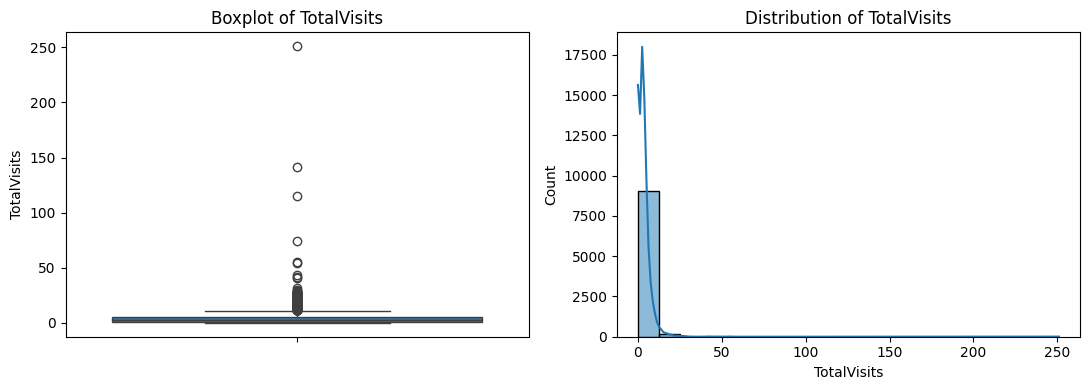

In [300]:
#Check for outliers in the TotalVisits columns - box plot and histogram to check the distributions
plt.figure(figsize=(11, 4))

# Box plot for 'TotalVisits' column
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df_leads['TotalVisits'])
plt.title('Boxplot of TotalVisits')

# Histogram for the 'TotalVisits' column
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_leads['TotalVisits'], bins=20, kde=True)
plt.title('Distribution of TotalVisits')

plt.tight_layout() 
plt.show()  


In [301]:
# Followed the IQR method to remove the outliers instead of top/bottom 1% data as data is not normal,skewed distributions and extreme outliers 
# IQR more robust to handle such cases
Q3=df_leads['TotalVisits'].quantile(0.75)
Q1=df_leads['TotalVisits'].quantile(0.25)
IQR=Q3-Q1
IQR
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (upperbound,lowerbound)
#treating the outliers in the TotalVisits column with Upperbound
df_leads['TotalVisits']=np.where(df_leads['TotalVisits']>upperbound,upperbound,df_leads['TotalVisits'])

11.0 -5.0


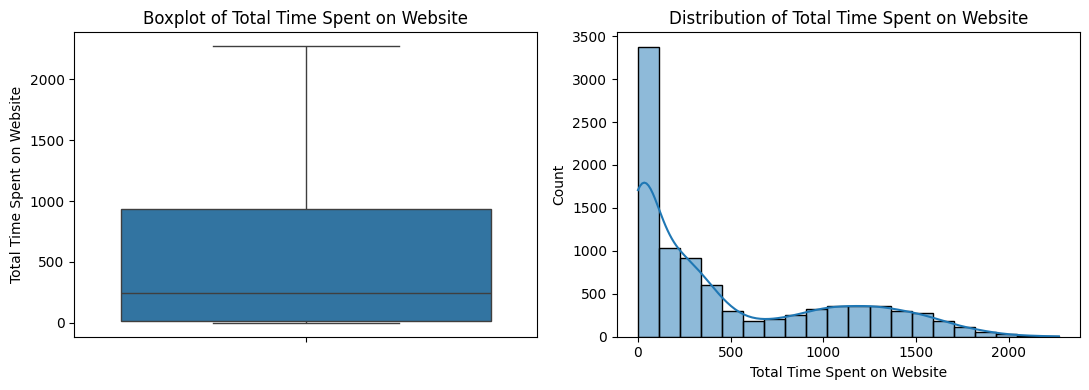

In [302]:
#Check for outliers in the 'Total Time Spent on Website' columns - box plot and histogram to check the distributions
plt.figure(figsize=(11, 4))

# Box plot for 'TotalVisits' column
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df_leads['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')

# Histogram for the 'TotalVisits' column
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_leads['Total Time Spent on Website'], bins=20, kde=True)
plt.title('Distribution of Total Time Spent on Website')

plt.tight_layout()  
plt.show()  

In [303]:
#remove outliers from Total Time Spent on Website
Q3=df_leads['Total Time Spent on Website'].quantile(0.75)
Q1=df_leads['Total Time Spent on Website'].quantile(0.25)
IQR=Q3-Q1
IQR
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (upperbound,lowerbound)
#treating the outliers in the TotalVisits column with Upperbound
df_leads['Total Time Spent on Website']=np.where(df_leads['Total Time Spent on Website']>upperbound,upperbound,df_leads['Total Time Spent on Website'])


2322.0 -1374.0


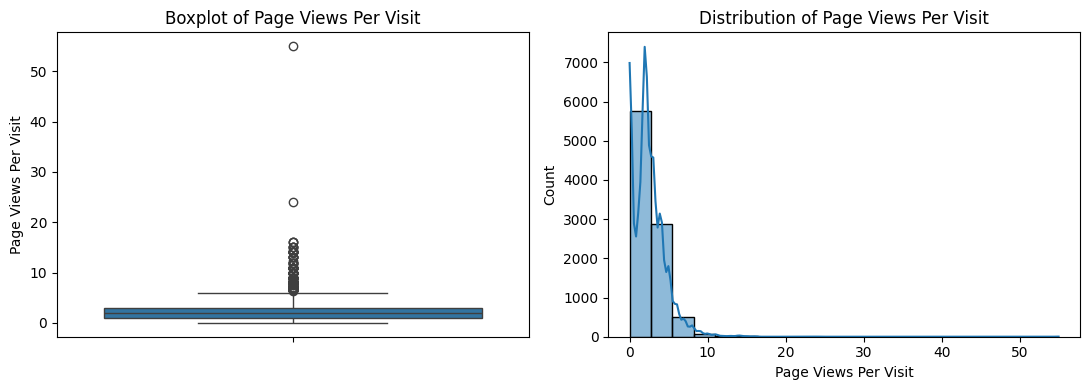

In [304]:
#Check for outliers in the 'Page Views Per Visit' columns - box plot and histogram to check the distributions
plt.figure(figsize=(11, 4))

# Box plot for 'TotalVisits' column
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df_leads['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')

# Histogram for the 'TotalVisits' column
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_leads['Page Views Per Visit'], bins=20, kde=True)
plt.title('Distribution of Page Views Per Visit')

plt.tight_layout()  
plt.show() 

In [305]:
#remove outliers from Page Views Per Visit

Q3=df_leads['Page Views Per Visit'].quantile(0.75)
Q1=df_leads['Page Views Per Visit'].quantile(0.25)
IQR=Q3-Q1
IQR
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (upperbound,lowerbound)
#treating the outliers in the TotalVisits column with Upperbound
df_leads['Page Views Per Visit']=np.where(df_leads['Page Views Per Visit']>upperbound,upperbound,df_leads['Page Views Per Visit'])



6.0 -2.0


In [306]:
df_leads.shape

(9240, 28)

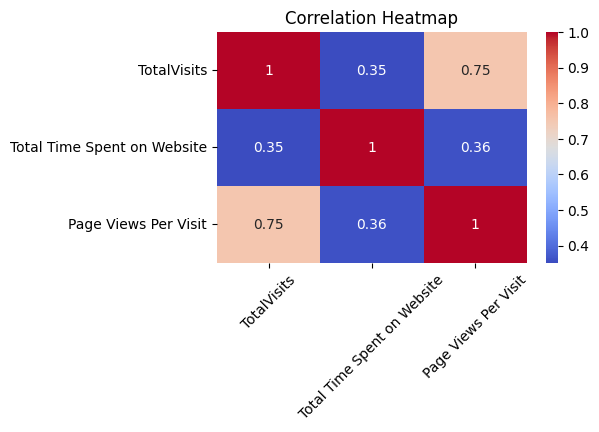

In [307]:
# Checking the correlation between the numerical columns TotalVisits Total Time Spent on Website Page Views Per Visit
numeric_data_cols =df_leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
# Create a pairplot to visualize the correlation
# Plot the heatmap
plt.figure(figsize=(5, 3))  # Size of the figure
sns.heatmap(numeric_data_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [308]:
# Checking the values of Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations

cols_to_check= ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses'
          ,'Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

for column in cols_to_check:
    print(df_leads[column].value_counts())
    print('-----------------------------------')

Search
0    9226
1      14
Name: count, dtype: int64
-----------------------------------
Magazine
0    9240
Name: count, dtype: int64
-----------------------------------
Newspaper Article
0    9238
1       2
Name: count, dtype: int64
-----------------------------------
X Education Forums
0    9239
1       1
Name: count, dtype: int64
-----------------------------------
Newspaper
0    9239
1       1
Name: count, dtype: int64
-----------------------------------
Digital Advertisement
0    9236
1       4
Name: count, dtype: int64
-----------------------------------
Through Recommendations
0    9233
1       7
Name: count, dtype: int64
-----------------------------------
Receive More Updates About Our Courses
0    9240
Name: count, dtype: int64
-----------------------------------
Update me on Supply Chain Content
0    9240
Name: count, dtype: int64
-----------------------------------
I agree to pay the amount through cheque
0    9240
Name: count, dtype: int64
---------------------------------

Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses, Update me on Supply Chain Content , I agree to pay the amount through cheque are all 0 values 

These columns should be dropped.

In [309]:
# Drop the columns as they have only one value Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses, Update me on Supply Chain Content , I agree to pay the amount through cheque
Cols_with_one_value = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses'
          ,'Update me on Supply Chain Content','I agree to pay the amount through cheque']

df_leads.drop(Cols_with_one_value, axis=1, inplace=True)

In [310]:
df_leads['Get updates on DM Content'].value_counts()

Get updates on DM Content
0    9240
Name: count, dtype: int64

In [311]:
# Drop Get updates on DM Content' as it has only one value
df_leads.drop('Get updates on DM Content', axis=1, inplace=True)

In [312]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Do Not Call                             9240 non-null   int64  
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   float64
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [313]:
# Country has so many values and 97% is India so droping the Country column
df_leads.drop('Country',axis=1, inplace=True)

In [314]:
# Check of prospect id is unique
df_leads['Prospect ID'].nunique()

9240

In [315]:
# Check of Lead Number  is unique
df_leads['Lead Number'].nunique()

9240

In [316]:
# as Prospect ID and Lead Number are unique identifiers values they won't play any role in regression Hence droping them
df_leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [317]:
df_leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Occupation                                0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [318]:
df_leads.head(3)    

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Management Specializations,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Management Specializations,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Specializations,Student,Will revert after reading the email,1,Email Opened


In [319]:
# Dummy Variables creation for categorical variables with more than two values
# Creating a dummy variable for the variable 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Occupation', 'Tags', 
dummy1 = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Occupation', 'Tags','Last Notable Activity' ]], drop_first=True, dtype=int)

df_leads = pd.concat([df_leads, dummy1], axis=1)

In [320]:
df_leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Management Specializations,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Management Specializations,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Specializations,Student,Will revert after reading the email,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [321]:
# Drop the original columns after dummy variable creation
df_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Occupation', 'Tags','Last Notable Activity'], axis=1, inplace=True)


In [322]:
df_leads.shape

(9240, 93)

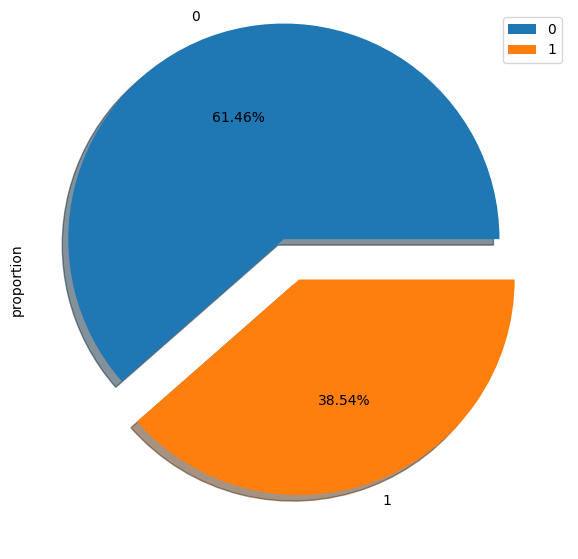

In [323]:
# # Checking the Coversion rate to check for class imbalance 
# Plotting the conversion rate
plt.figure(figsize=(8,7))
df_leads.Converted.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.2,0],shadow=True)
plt.legend()

## Train Test split 

In [324]:
# Train Test sets 
X= df_leads.drop(['Converted'], axis=1)
y= df_leads['Converted']

In [325]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532.0,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [326]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [327]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6468, 92), (2772, 92), (6468,), (2772,))

In [328]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

## Building the model 

In [329]:
# Create the first model with all the features
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           87
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Feb 2025   Deviance:                   1.0279e+05
Time:                        10:02:25   Pearson chi2:                 5.03e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2.597e+15   5.38e+07   4.83e+07      0.000     2.6e+15     2.6e+15
Do Not Email                                           -2.094e+14   4.43e+06  -4.72e+07      0.000   -2.09e+14   -2.09e+14
Do Not Call                                             3.352e+15   4.76e+07   7.05e+07      0.000    3.35e+15    3.35e+15
TotalVisits                                             1.188e+14   1.38e+06   8.63e+07      0.000    1.19e+14    1.19e+14
Total Time Spent on Website                             4.529e+14   9.68e+05   4.68e+08      0.000    4.53e+14    4.53e+14
Page Views Per Visit                                   -8.397e+13   1.46e+06  -5.74e+07      0.000    -8.4e+13    -8.4e+13
A free copy of Mastering The Interview                 -7.944e+13   2.57e+06  -3.09e+07      0.000   -7.94e+13   -7.94e+13
Lead Origin_Landing Page Submission                     1.649e+13   2.65e+06   6.22e+06      0.000    1.65e+13    1.65e+13
Lead Origin_Lead Add Form                               1.068e+15   1.29e+07   8.26e+07      0.000    1.07e+15    1.07e+15
Lead Origin_Lead Import                                 2.737e+15   4.88e+07   5.61e+07      0.000    2.74e+15    2.74e+15
Lead Origin_Quick Add Form                              3.822e+15   6.74e+07   5.67e+07      0.000    3.82e+15    3.82e+15
Lead Source_Direct Traffic                             -7.337e+14   4.26e+07  -1.72e+07      0.000   -7.34e+14   -7.34e+14
Lead Source_Facebook                                   -4.134e+15   6.46e+07   -6.4e+07      0.000   -4.13e+15   -4.13e+15
Lead Source_Google                                     -8.304e+14   4.25e+07  -1.95e+07      0.000    -8.3e+14    -8.3e+14
Lead Source_Live Chat                                    3.04e+15   6.25e+07   4.86e+07      0.000    3.04e+15    3.04e+15
Lead Source_NC_EDM                                      4.031e+15   7.95e+07   5.07e+07      0.000    4.03e+15    4.03e+15
Lead Source_Olark Chat                                 -7.868e+14   4.26e+07  -1.85e+07      0.000   -7.87e+14   -7.87e+14
Lead Source_Organic Search                             -6.695e+14   4.26e+07  -1.57e+07      0.000    -6.7e+14    -6.7e+14
Lead Source_Pay per Click Ads                           -3.22e+15   7.95e+07  -4.05e+07      0.000   -3.22e+15   -3.22e+15
Lead Source_Press_Release                               -4.39e+15   6.41e+07  -6.85e+07      0.000   -4.39e+15   -4.39e+15
Lead Source_Reference                                  -6.719e+14   4.07e+07  -1.65e+07      0.000   -6.72e+14   -6.72e+14
Lead Source_Referral Sites                             -6.512e+14   4.31e+07  -1.51e+07      0.000   -6.51e+14   -6.51e+14
Lead Sou

In [330]:
#check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
39,Last Activity_Resubscribed to emails,inf
32,Last Activity_Email Marked Spam,inf
87,Last Notable Activity_Resubscribed to emails,inf
79,Last Notable Activity_Email Marked Spam,inf
84,Last Notable Activity_Modified,1779.13
...,...,...
9,Lead Origin_Quick Add Form,1.01
1,Do Not Call,1.01
66,Tags_Shall take in the next coming month,1.00
26,Lead Source_testone,NaN


In [331]:
# as there are so many variables with very high VIF it will difficult to manually remove the varibales. 
# We will use RFE to select the variables
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)    # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)              # Fit RFE on X_train and y_train

# Extract the columns which are selected by RFE
selected_features=X_train.columns[rfe.support_]
print(selected_features)


Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [332]:
# Transform X_train to contain only the selected features
X_train_selected = X_train[selected_features]
X_train_selected.head(3)


,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
1871,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [333]:
# Create the model 2
import statsmodels.api as sm

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.8
Date:                Tue, 18 Feb 2025   Deviance:                       4147.6
Time:                        10:02:38   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4975
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.0978      0.208    -19.689      0.000      -4.506      -3.690
Do Not Email                                      -1.4320      0.171     -8.354      0.000      -1.768      -1.096
Lead Origin_Lead Add Form                          2.4038      0.213     11.271      0.000       1.986       2.822
Last Activity_Olark Chat Conversation             -1.7036      0.164    -10.377      0.000      -2.025      -1.382
Occupation_Working Professional                    2.8980      0.232     12.509      0.000       2.444       3.352
Tags_Busy                                          3.0193      0.298     10.141      0.000       2.436       3.603
Tags_Closed by Horizzon                            8.7506      1.027      8.520      0.000       6.738      10.764
Tags_Interested in Next batch                     24.4030      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Tags_Lateral student                              25.8717   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Tags_Lost to EINS                                  8.2410      0.750     10.986      0.000       6.771       9.711
Tags_Ringing                                      -1.1039      0.305     -3.622      0.000      -1.701      -0.507
Tags_Will revert after reading the email           3.5918      0.209     17.168      0.000       3.182       4.002
Tags_in touch with EINS                            2.9423      0.763      3.858      0.000       1.448       4.437
Tags_switched off                                 -1.2705      0.555     -2.290      0.022      -2.358      -0.183
Last Notable Activity_Had a Phone Conversation     3.5546      1.312      2.709      0.007       0.983       6.127
Last Notable Activity_SMS Sent                     2.4830      0.109     22.757      0.000       2.269       2.697
==================================================================================================================
"""

In [334]:
# remove the variable with high p value- Tags_Interested in Next batch
selected_features=selected_features.drop('Tags_Lateral student')
X_train_selected = X_train[selected_features]

In [335]:
# Create the model 3 with selected features
import statsmodels.api as sm

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
logm3.fit().summary()
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.3
Date:                Tue, 18 Feb 2025   Deviance:                       4164.6
Time:                        10:02:38   Pearson chi2:                 1.16e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.0051      0.200    -20.018      0.000      -4.397      -3.613
Do Not Email                                      -1.4352      0.171     -8.381      0.000      -1.771      -1.100
Lead Origin_Lead Add Form                          2.4128      0.213     11.342      0.000       1.996       2.830
Last Activity_Olark Chat Conversation             -1.7054      0.164    -10.394      0.000      -2.027      -1.384
Occupation_Working Professional                    2.8789      0.230     12.535      0.000       2.429       3.329
Tags_Busy                                          2.9285      0.292     10.027      0.000       2.356       3.501
Tags_Closed by Horizzon                            8.6576      1.025      8.443      0.000       6.648      10.667
Tags_Interested in Next batch                     23.3148   1.21e+04      0.002      0.998   -2.37e+04    2.37e+04
Tags_Lost to EINS                                  8.1489      0.748     10.895      0.000       6.683       9.615
Tags_Ringing                                      -1.1940      0.299     -3.991      0.000      -1.780      -0.608
Tags_Will revert after reading the email           3.5002      0.201     17.394      0.000       3.106       3.895
Tags_in touch with EINS                            2.8500      0.760      3.749      0.000       1.360       4.340
Tags_switched off                                 -1.3590      0.552     -2.463      0.014      -2.440      -0.278
Last Notable Activity_Had a Phone Conversation     3.5174      1.295      2.715      0.007       0.978       6.056
Last Notable Activity_SMS Sent                     2.4790      0.109     22.799      0.000       2.266       2.692
==================================================================================================================
"""

In [336]:
# remove Tags_Lateral student	 as it has high p value
selected_features=selected_features.drop('Tags_Interested in Next batch')
X_train_selected = X_train[selected_features]

In [337]:
# Create the model 4 with selected features
import statsmodels.api as sm

logm4 = sm.GLM(y_train,(sm.add_constant(X_train_selected)), family = sm.families.Binomial())
logm4.fit().summary()
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Tue, 18 Feb 2025   Deviance:                       4181.1
Time:                        10:02:38   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Do Not Email                                      -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Lead Origin_Lead Add Form                          2.4157      0.212     11.395      0.000       2.000       2.831
Last Activity_Olark Chat Conversation             -1.7018      0.164    -10.380      0.000      -2.023      -1.380
Occupation_Working Professional                    2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                          2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                            8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                  8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                      -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email           3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                            2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                 -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation     3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                     2.5090      0.109     23.031      0.000       2.295       2.722
==================================================================================================================
"""

In [338]:
# Check the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_selected.columns
vif['VIF']=[variance_inflation_factor(X_train_selected.values,i) for i in range(X_train_selected.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.59
12,Last Notable Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.30
5,Tags_Closed by Horizzon,1.20
3,Occupation_Working Professional,1.18
2,Last Activity_Olark Chat Conversation,1.13
7,Tags_Ringing,1.10
0,Do Not Email,1.06
10,Tags_switched off,1.04
4,Tags_Busy,1.03


All VIFs are less than 2 so accpetng the model

In [339]:

y_train_pred=res.predict(sm.add_constant(X_train_selected))

y_train_pred[:10]

1871    0.005354
6795    0.375188
3516    0.005354
8105    0.062056
3934    0.375188
4844    0.992259
3297    0.005354
8071    0.999951
987     0.375188
7423    0.880686
dtype: float64

In [340]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Converted_prob":y_train_pred})
y_train_pred_final['ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
1871,0,0.005354,1871
6795,0,0.375188,6795
3516,0,0.005354,3516
8105,0,0.062056,8105
3934,0,0.375188,3934


In [341]:
# Creating new column 'predicted' with 1 if Churn_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
1871,0,0.005354,1871,0
6795,0,0.375188,6795,0
3516,0,0.005354,3516,0
8105,0,0.062056,8105,0
3934,0,0.375188,3934,0


In [342]:
# confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3869  133]
 [ 786 1680]]


In [343]:
# check the overall accuracy 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8579158936301794


In [344]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [345]:
# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity",Sensitivity)


# Specificity
Specificity = TN / float(TN+FP)
print("Specificity",Specificity)

# Precision
Precision = TP / float(TP+FP)
print("Precision",Precision)

Sensitivity 0.681265206812652
Specificity 0.9667666166916542
Precision 0.9266409266409267


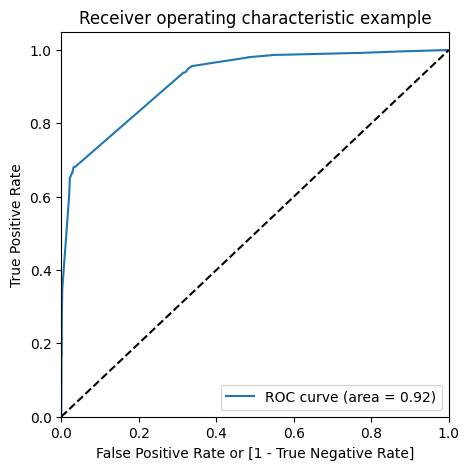

In [346]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding the optimal value of the cut off 

In [347]:
#  let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.34,0.35,0.35,0.36,0.37,0.375,0.39,0.4,0.5,0.6,0.7,0.8,0.9] 

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0))
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

        prob  accuracy     sensi     speci
0.000  0.000  0.381262  1.000000  0.000000
0.100  0.100  0.747372  0.964315  0.613693
0.200  0.200  0.774273  0.956610  0.661919
0.300  0.300  0.781385  0.938767  0.684408
0.340  0.340  0.781385  0.938767  0.684408
0.350  0.350  0.781385  0.938767  0.684408
0.360  0.360  0.781385  0.938767  0.684408
0.370  0.370  0.781385  0.938767  0.684408
0.375  0.375  0.781385  0.938767  0.684408
0.390  0.390  0.856370  0.681671  0.964018
0.400  0.400  0.856215  0.681265  0.964018
0.500  0.500  0.857916  0.681265  0.966767
0.600  0.600  0.858689  0.681265  0.968016
0.700  0.700  0.855133  0.667478  0.970765
0.800  0.800  0.854669  0.665045  0.971514
0.900  0.900  0.750773  0.350770  0.997251


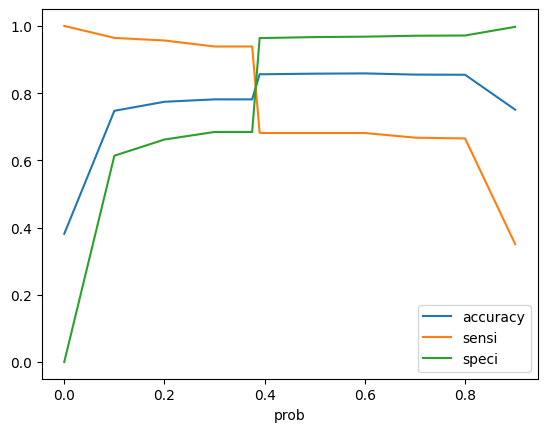

In [348]:
# Lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.35 seems to be the best in terms of accuracy, sensitivity and specifictiy 

In [349]:
# Creating new column 'predicted' with 1 if Churn_prob > 0.3 else 0, as we are targetting coversion Sensitivity should be high 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
1871,0,0.005354,1871,0
6795,0,0.375188,6795,1
3516,0,0.005354,3516,0
8105,0,0.062056,8105,0
3934,0,0.375188,3934,1


In [350]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2739 1263]
 [ 151 2315]]


In [351]:
# check the overall accuracy 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.7813852813852814


In [352]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [353]:
# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity",Sensitivity)


# Specificity
Specificity = TN / float(TN+FP)
print("Specificity",Specificity)

# Precision
Precision = TP / float(TP+FP)
print("Precision",Precision)

Sensitivity 0.9387672343876723
Specificity 0.684407796101949
Precision 0.6470095025153717


# # Evaluating the model on test set 

In [354]:
# Scale the X test as per the train set 
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
# Select the columns as per the Train set 
X_test = X_test[selected_features]




In [355]:
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,0,1,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,1,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,0,1,0,0,0,0,0,0,1,0,0,0,0


In [356]:
 # Making predictions on the test set
y_test_pred = res.predict(sm.add_constant(X_test))   

In [357]:
y_test_pred[:10]

4269    0.880686
2376    0.988046
7766    0.912491
9199    0.003745
4359    0.870530
9186    0.880686
1631    0.375188
8963    0.375188
8007    0.375188
5324    0.880686
dtype: float64

In [358]:
y_test_pred_final=pd.DataFrame({"Converted":y_test.values,"Converted_prob":y_test_pred})
y_test_pred_final['Lead']=y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Lead
4269,1,0.880686,4269
2376,1,0.988046,2376
7766,1,0.912491,7766
9199,0,0.003745,9199
4359,1,0.870530,4359


In [359]:
# Creating new column 'predicted' with 1 if Churn_prob > 0.375 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.375 else 0)
y_test_pred_final.head()

,Converted,Converted_prob,Lead,predicted
4269,1,0.880686,4269,1
2376,1,0.988046,2376,1
7766,1,0.912491,7766,1
9199,0,0.003745,9199,0
4359,1,0.870530,4359,1


In [360]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[1132  545]
 [  57 1038]]


In [361]:
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted ))

0.7828282828282829


In [362]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity",Sensitivity)


# Specificity
Specificity = TN / float(TN+FP)
print("Specificity",Specificity)

# Precision
Precision = TP / float(TP+FP)
print("Precision",Precision)

Sensitivity 0.947945205479452
Specificity 0.6750149075730472
Precision 0.6557169930511687


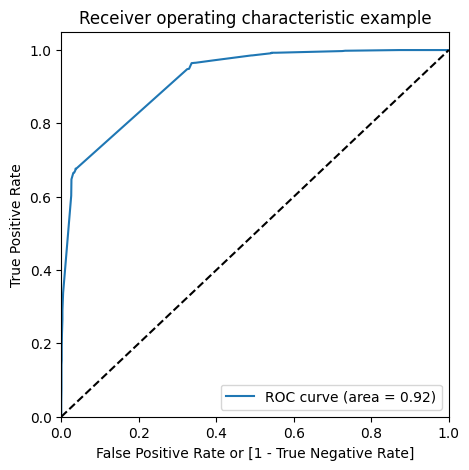

In [363]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

In [364]:
# For logm3 model sort the coeeficients to check the top 10 features
res.params.sort_values(ascending=False).head(15)


Tags_Closed by Horizzon                           8.533372
Tags_Lost to EINS                                 8.023987
Last Notable Activity_Had a Phone Conversation    3.472579
Tags_Will revert after reading the email          3.371749
Occupation_Working Professional                   2.854458
Tags_Busy                                         2.790407
Tags_in touch with EINS                           2.723909
Last Notable Activity_SMS Sent                    2.508968
Lead Origin_Lead Add Form                         2.415679
Tags_Ringing                                     -1.342857
Do Not Email                                     -1.414326
Tags_switched off                                -1.507874
Last Activity_Olark Chat Conversation            -1.701778
const                                            -3.881771
dtype: float64

In [365]:
res.params.sort_values(ascending=True).head(15)

const                                            -3.881771
Last Activity_Olark Chat Conversation            -1.701778
Tags_switched off                                -1.507874
Do Not Email                                     -1.414326
Tags_Ringing                                     -1.342857
Lead Origin_Lead Add Form                         2.415679
Last Notable Activity_SMS Sent                    2.508968
Tags_in touch with EINS                           2.723909
Tags_Busy                                         2.790407
Occupation_Working Professional                   2.854458
Tags_Will revert after reading the email          3.371749
Last Notable Activity_Had a Phone Conversation    3.472579
Tags_Lost to EINS                                 8.023987
Tags_Closed by Horizzon                           8.533372
dtype: float64